<a href="https://colab.research.google.com/github/Faouzi-Slimi/Tensorflow-Certification/blob/main/Computer_Vision_and_Convolutional_Neural_Networks_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

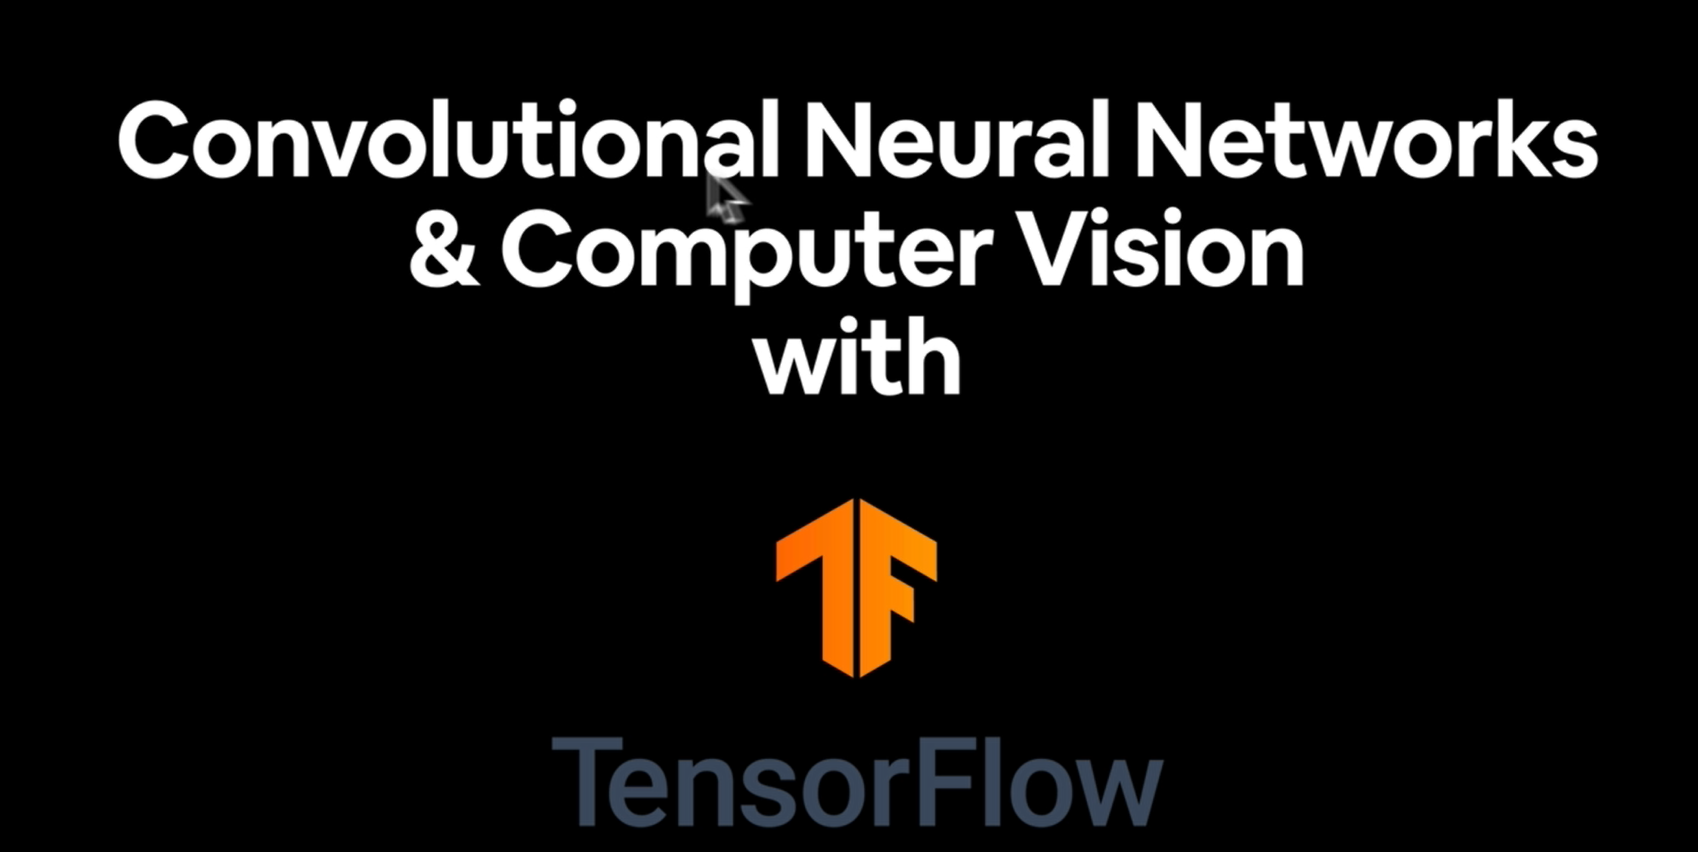

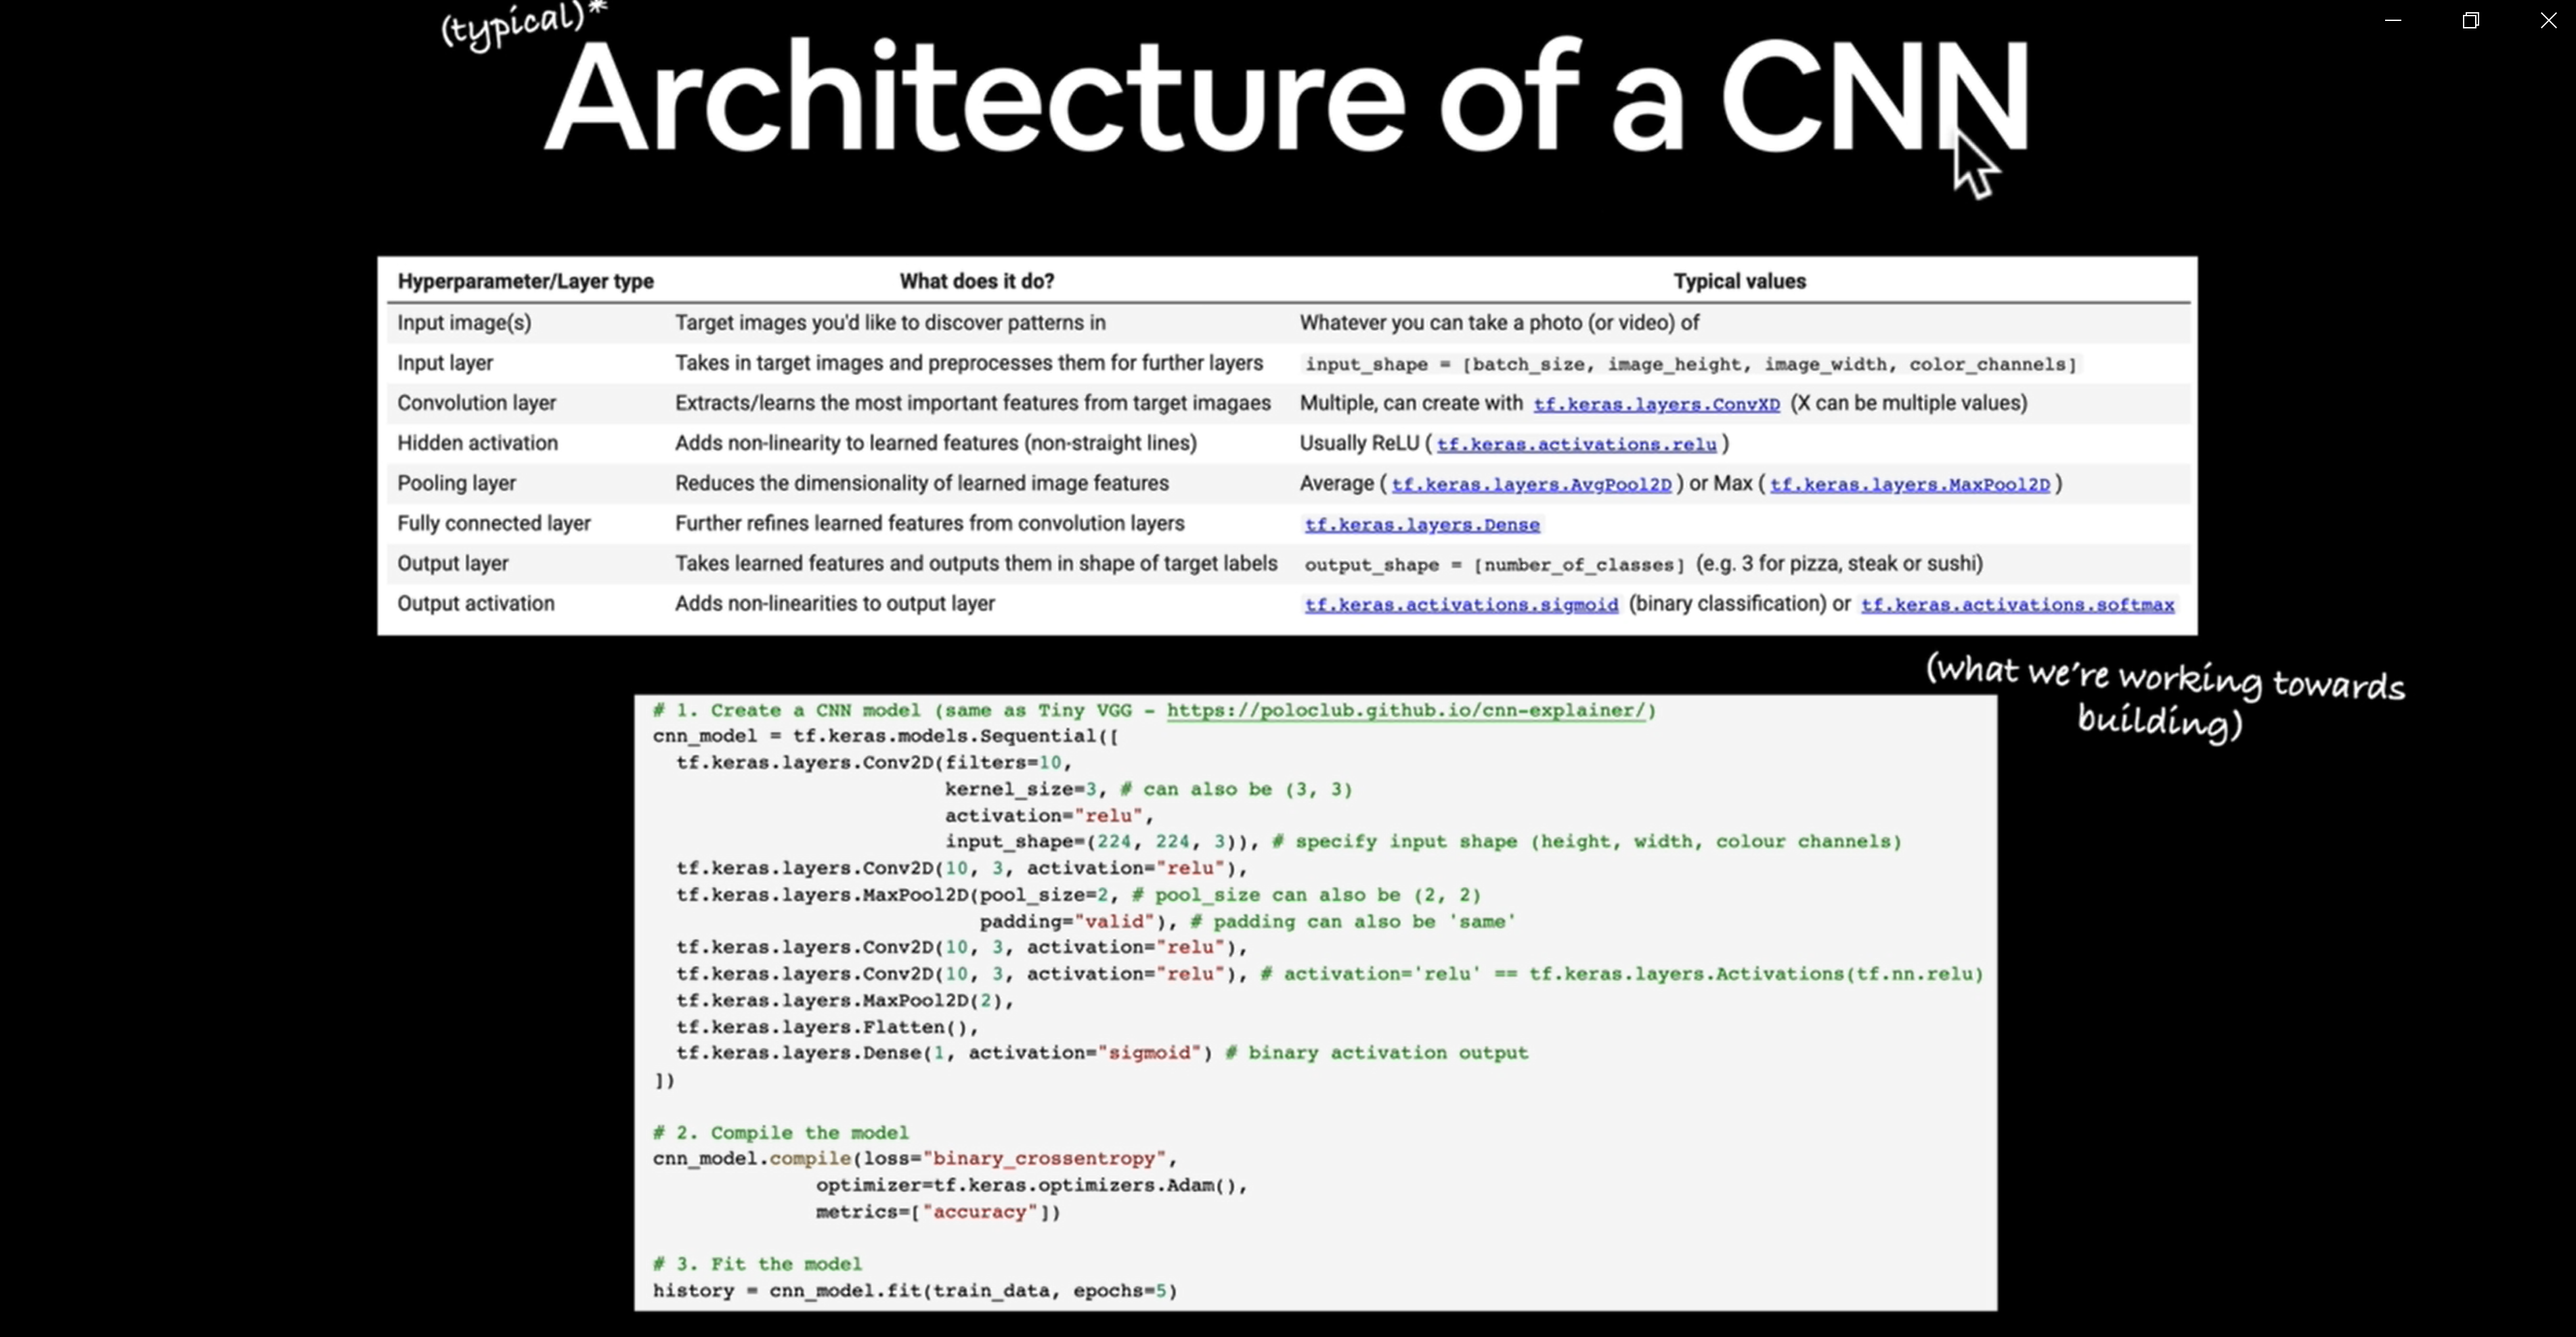

## Introduction to convolution Neural networks and computer vision with tensrflow

#Get the data

In [1]:
# Get the data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-07-16 09:59:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   144MB/s    in 0.7s    

2022-07-16 09:59:37 (144 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

# Inspect the data

In [3]:
import os

for dirpath , dirnames,filenames in os.walk("pizza_steak"):
  print({f"there are {len(dirnames)} directories and {len(filenames)} in  : {dirpath}"})

{'there are 2 directories and 0 in  : pizza_steak'}
{'there are 2 directories and 0 in  : pizza_steak/test'}
{'there are 0 directories and 250 in  : pizza_steak/test/steak'}
{'there are 0 directories and 250 in  : pizza_steak/test/pizza'}
{'there are 2 directories and 0 in  : pizza_steak/train'}
{'there are 0 directories and 750 in  : pizza_steak/train/steak'}
{'there are 0 directories and 750 in  : pizza_steak/train/pizza'}


In [4]:
!ls la pizza_steak

ls: cannot access 'la': No such file or directory
pizza_steak:
test  train


In [5]:
# Anothor way to find out how many images are in a file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

## To visualize our images, first let's get the class names programmatically 

In [6]:
# Get the class name programmatically

import pathlib 
import numpy as np
data_dir  = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))# Create a list of class name

print(class_names)


['pizza' 'steak']


In [7]:
# Let's visualize our img

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image (target_dir , target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  img = mpimg.imread(target_folder + "/"+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape : {img.shape}")
  return img

['1925230.jpg']
Image shape : (512, 512, 3)


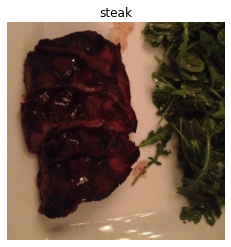

In [8]:
# steak
img = view_random_image(target_dir = "pizza_steak/train/",target_class ="steak" )

['1260554.jpg']
Image shape : (512, 512, 3)


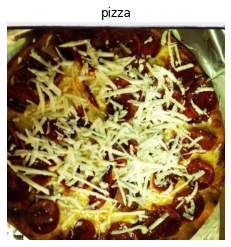

In [9]:
# pizza
img = view_random_image(target_dir = "pizza_steak/train/",target_class ="pizza" )


In [10]:
# View the image shape

img.shape # returns width , height ,colour channels


(512, 512, 3)

In [11]:
# Get all the pixel values between 0 and 1

img/255.0

array([[[0.92941176, 0.93333333, 0.94117647],
        [0.92941176, 0.93333333, 0.94117647],
        [0.92941176, 0.93333333, 0.94117647],
        ...,
        [0.94509804, 0.94901961, 0.96862745],
        [0.94901961, 0.95294118, 0.97254902],
        [0.94901961, 0.95294118, 0.97254902]],

       [[0.93333333, 0.9372549 , 0.94509804],
        [0.93333333, 0.9372549 , 0.94509804],
        [0.92941176, 0.93333333, 0.94117647],
        ...,
        [0.94901961, 0.95294118, 0.97254902],
        [0.94509804, 0.94901961, 0.96862745],
        [0.9372549 , 0.94117647, 0.96078431]],

       [[0.9372549 , 0.9372549 , 0.94509804],
        [0.93333333, 0.93333333, 0.94117647],
        [0.93333333, 0.93333333, 0.94117647],
        ...,
        [0.9372549 , 0.94117647, 0.96078431],
        [0.93333333, 0.9372549 , 0.95686275],
        [0.9254902 , 0.92941176, 0.94901961]],

       ...,

       [[0.97254902, 1.        , 0.96862745],
        [0.97254902, 1.        , 0.97254902],
        [0.97254902, 1

# An end-to-end example

Let's bouild a neural network :


In [12]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the random_seed

tf.random.set_seed(42)

# preprocess data

train_datagen = ImageDataGenerator(rescale=1/255.0)
valid_datagen = ImageDataGenerator(rescale=1/255.0)
# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"
# Import data from directories and turn it into batches

train_data = train_datagen.flow_from_directory(directory = train_dir , batch_size = 32,target_size = (224,224),class_mode = "binary",seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir , batch_size = 32,target_size = (224,224),class_mode = "binary",seed = 42)




Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
# Build a CNN model

model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters = 10 , kernel_size=3,activation = "relu",input_shape = (224,224,3)),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.MaxPool2D(pool_size = 2,padding = "valid"),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1,activation = "sigmoid")
])

# Copile our cnn

model_1.compile(loss = "binary_crossentropy",optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
# Fit the model

history_1 = model_1.fit(train_data,epochs = 5 , steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 25s 212ms/step - loss: 0.5673 - accuracy: 0.6860 - val_loss: 0.3828 - val_accuracy: 0.8440
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4368 - accuracy: 0.8027 - val_loss: 0.3619 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 10s 202ms/step - loss: 0.3873 - accuracy: 0.8293 - val_loss: 0.3232 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 9s 202ms/step - loss: 0.3728 - accuracy: 0.8307 - val_loss: 0.3480 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3415 - accuracy: 0.8580 - val_loss: 0.3317 - val_accuracy: 0.8540


In [14]:
# get a model summary

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

##Using the same model as before

In [15]:
# Set the random seed

tf.random.set_seed(42)

#Create a model to replicate the tensorflow Playground model

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(4,activation = "relu"),
                               tf.keras.layers.Dense(4,activation = "relu"),
                               tf.keras.layers.Dense(1,activation = "sigmoid")
])

# compile the model

model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),metrics=["accuracy"]
                )
# fit the model 
history_2 = model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                validation_data=valid_data,
                validation_steps = len(valid_data))


Epoch 1/5
47/47 [==============================] - 9s 185ms/step - loss: 0.9396 - accuracy: 0.5113 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [16]:
# Get a summary of model 2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters then ou CNN , let's try to improve it

In [18]:
# set_the random seed
tf.random.set_seed(42)
#Create a model to replicate the tensorflow Playground model

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(100,activation = "relu"),
                               tf.keras.layers.Dense(100,activation = "relu"),
                               tf.keras.layers.Dense(100,activation = "relu"),
                               tf.keras.layers.Dense(1,activation = "sigmoid")
])

# compile the model

model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),metrics=["accuracy"]
                )
# fit the model 
history_3 = model_3.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                validation_data=valid_data,
                validation_steps = len(valid_data))


Epoch 1/5
47/47 [==============================] - 9s 189ms/step - loss: 2.3575 - accuracy: 0.6427 - val_loss: 0.7256 - val_accuracy: 0.7320
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.7422 - accuracy: 0.7047 - val_loss: 0.7245 - val_accuracy: 0.7400
Epoch 3/5
47/47 [==============================] - 8s 181ms/step - loss: 0.6323 - accuracy: 0.7360 - val_loss: 0.4898 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.5283 - accuracy: 0.7787 - val_loss: 0.5439 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 11s 242ms/step - loss: 0.4807 - accuracy: 0.7800 - val_loss: 0.4560 - val_accuracy: 0.7900


In [19]:
# get a summary of model 3
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_8 (Dense)             (None, 100)               15052900  
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


##Binary classification : let's break in down
1.Become one with the data
2. Preprocess the data 
3.created a model
4. fit the model
5. evaluate the model
6.Adjust different parametres and improve the model
7. Repeat until satisfied

#.Become one with the data

['568972.jpg']
Image shape : (512, 512, 3)
['513754.jpg']
Image shape : (512, 382, 3)


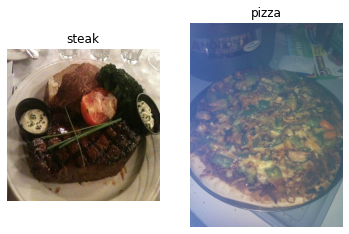

In [22]:
# Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

#2.Preprocess the data


In [27]:
# Define directory dataset paths

train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

## Turn our data into ** Batches **

# Create train and test data generator and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)



In [28]:
# Load in our image data 

train_data = train_datagen.flow_from_directory(directory = train_dir,target_size =(224,224),class_mode = "binary",batch_size = 32 )
test_data = test_datagen.flow_from_directory(directory = test_dir,target_size = (224,224),class_mode = "binary",batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [29]:
# Get a sample of a train data batch

images , labels = train_data.next()
len(images),len(labels)

(32, 32)

In [30]:
# How many batches are there?
len(train_data)

47

In [31]:
# Get the first two images

images[:2],images[0].shape

(array([[[[0.69411767, 0.5686275 , 0.50980395],
          [0.69411767, 0.57254905, 0.5019608 ],
          [0.69411767, 0.58431375, 0.5019608 ],
          ...,
          [0.5294118 , 0.427451  , 0.29803923],
          [0.5294118 , 0.427451  , 0.28235295],
          [0.5294118 , 0.43137258, 0.27058825]],
 
         [[0.7058824 , 0.58431375, 0.5137255 ],
          [0.69803923, 0.5882353 , 0.5058824 ],
          [0.6862745 , 0.5764706 , 0.49411768],
          ...,
          [0.54509807, 0.4431373 , 0.3137255 ],
          [0.5294118 , 0.427451  , 0.2901961 ],
          [0.5294118 , 0.427451  , 0.28235295]],
 
         [[0.6862745 , 0.5764706 , 0.4901961 ],
          [0.68235296, 0.57254905, 0.48627454],
          [0.69411767, 0.58431375, 0.5019608 ],
          ...,
          [0.5568628 , 0.45098042, 0.33333334],
          [0.5411765 , 0.43529415, 0.31764707],
          [0.5411765 , 0.43921572, 0.30980393]],
 
         ...,
 
         [[0.7725491 , 0.56078434, 0.41176474],
          [0.76862

In [32]:
# View the first batch of labels

labels

array([1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.],
      dtype=float32)

#3. Create a model

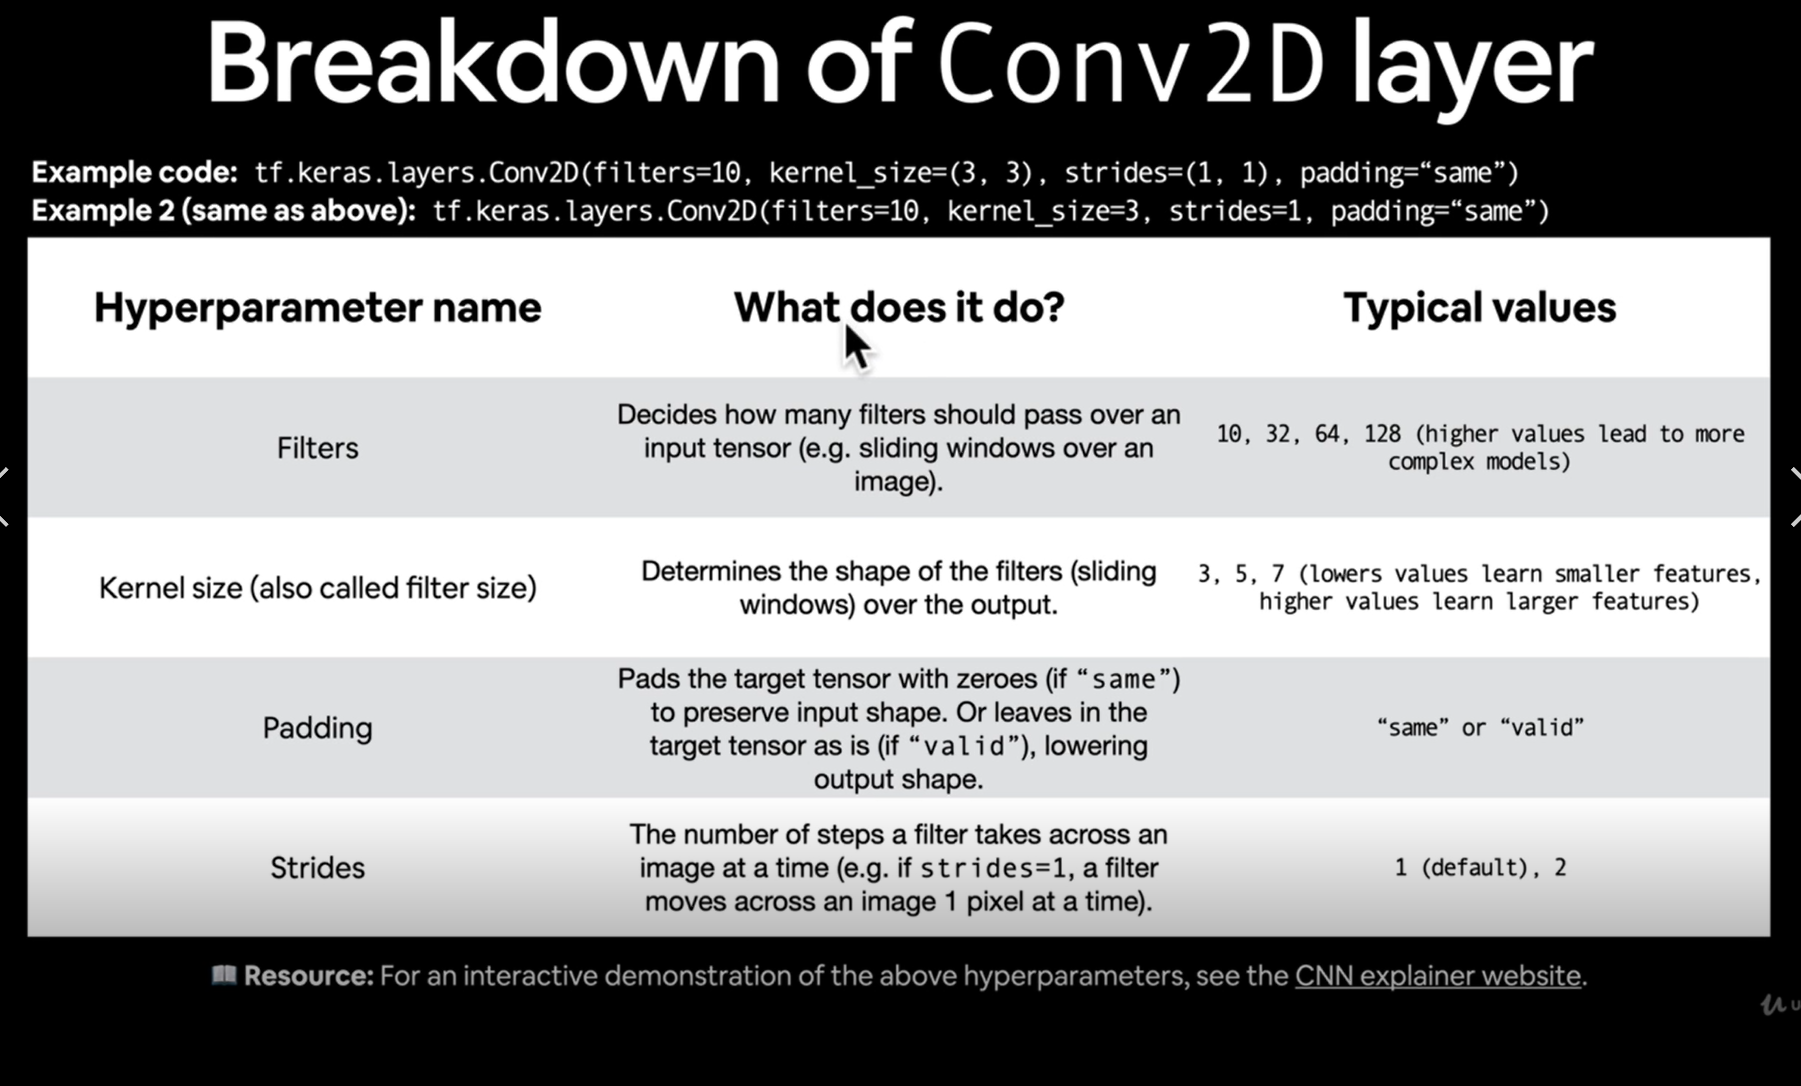

In [35]:
# Ler's make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation

from tensorflow.keras import Sequential



In [38]:
# Create the model 

model_4 = Sequential([Conv2D(filters = 10,kernel_size = 1,strides = 1,padding="valid",activation = "relu",input_shape = (224,224,3)),
                      Conv2D(10,3,activation = "relu"),
                      Flatten(),
                      Dense(1,activation="sigmoid")])
# Copile the model

model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model



In [39]:
# video 16